
# Machine Learning CM 2604 
## Individual Coursework

**RGU ID:** 2330950

**IIT ID:** 20231631

**Name:** Stephan Nelishka Dabare


**Introduction:**

In this project, I perform a simple classification problem using two machine learning models: a neural network and random forest classification. The objective is to predict whether a client will subscribe to a term deposit. The dataset used for this analysis is the Bank Marketing dataset, which is taken from the UCL Machine Learning Repository.

**Source:** https://archive.ics.uci.edu/dataset/222/bank%2Bmarketing

**About the dataset:**

The data related to marketing campaigns conducted by a Portuguese banking institution. This campaign was based on phone calls, and often required multiple contacts with the same client to determine whether they would subscribe to a term deposit, with a response of either 'yes' or 'no.' There are 4 datasets in that repository. I choose the `bank-full.csv` dataset. `bank-full.csv` contains all examples ordered by date.

**Objective:**

The objective is to predict if the client will subscribe a term deposit using neural network and random forest classification.

### 1. Understanding the dataset

In [31]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import weight_dict
from tensorflow.python.ops.numpy_ops.np_dtypes import int64

from SampleTest import X_test

In [32]:
data_frame = pd.read_csv('bank-full.csv', sep=';')

#### 1.1. Preview the dataset:

In [33]:
# get first 5 rows
data_frame.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### 1.2. Get the shape of the dataset:

In [34]:
# Print the number of rows and columns
data_frame.shape

(45211, 17)

**Dataset has:**
* 45211 rows
* 17 columns

#### 1.3. Get summary of the dataset: 

In [35]:
# Get summary of the dataset
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### 1.4. About numerical column data:

In [36]:
# Get summary of numerical columns
data_frame.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### 1.5. About categorical column data:

In [37]:
num = 1
# Iterate through the categorical columns
for col in data_frame.select_dtypes(include='object').columns:
    # Print the categories in each column
    print(str(num) + " " + col + " --> " + str(data_frame[col].unique()))
    num += 1

1 job --> ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
2 marital --> ['married' 'single' 'divorced']
3 education --> ['tertiary' 'secondary' 'unknown' 'primary']
4 default --> ['no' 'yes']
5 housing --> ['yes' 'no']
6 loan --> ['no' 'yes']
7 contact --> ['unknown' 'cellular' 'telephone']
8 month --> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
9 poutcome --> ['unknown' 'failure' 'other' 'success']
10 y --> ['no' 'yes']


**Categorical columns:**
* Nominal:

`job`,`marital`,`education`,`contact`,`month`,`poutcome`

* Binary:

`default`,`housing`,`loan`,`y`

### 2. About Attributes

#### Input variables:

1. `age` : Age of the client (numeric)
2. `job` : Job of client (categorical)
3. `marital` : Marital status (categorical)
4. `education` : Education level (categorical)
5. `default` : Client has credit in default? (categorical)
6. `balance` : Average yearly balance, in euros (numeric)
7. `housing` : Client has housing loan? (categorical)
8. `loan` : Client has personal loan? (categorical)
9. `contact` : Contact communication type with client (categorical)
10. `day` : Last contact day of the month (numeric)
11. `month` : Last contact month (categorical)
12. `duration` : Last contact duration, in seconds (numeric)
13. `campaign` : Number of contacts performed before during this campaign (numeric)
14. `pdays` : Number of days since the client was last contacted (numeric)
15. `previous` : Number of contacts performed before this campaign (numeric)
16. `poutcome` : Outcome of the previous campaign (categorical)

#### Output variable:

17. `y` : Client subscribed a term deposit? (binary: 'yes', 'no')

**Make separate dataframes for numerical and categorical columns**

In [38]:
# Get numerical columns
numerical_columns = data_frame.select_dtypes(include='int64').columns

# Get categorical columns
categorical_columns = data_frame.select_dtypes(include='object').columns

### 3. Exploratory Data Analysis (EDA)

#### 3.1. Select the correct columns

* Select all columns except the last column
* The last column --> target column
* For the entire project all columns are selected, no need to remove.

#### 3.2. Search for missing values

In [39]:
# Handle missing values
missing_value_col = []

# Check each column for missing values
for column in data_frame.columns:
    # If the column has any missing values, add to the list
    if data_frame[column].isnull().sum() > 0:
        missing_value_col.append(column)

    
# If no missing values are found
if not missing_value_col:
    print("No missing value found")
else:
    print("Missing values found in columns: ", missing_value_col)

No missing value found


* No missing values found

#### 3.3. Find the features with one value

In [40]:
# Iterate through all columns
for column in categorical_columns:
    # If a column has only one unique value
    print(column,data_frame[column].nunique())

job 12
marital 3
education 4
default 2
housing 2
loan 2
contact 3
month 12
poutcome 4
y 2


* There are no single value columns

#### 3.4. Search for duplicate rows

In [41]:
# Check for duplicate rows
print(f"Duplicate rows: {data_frame.duplicated().sum()}")

Duplicate rows: 0


* There are no duplicate rows

#### 3.5. Explore the numerical columns

#### 3.5.1. Search for discrete numerical columns

In [42]:
# Identify discrete numerical columns
discrete_numerical_columns = []

# Iterate through numerical columns
for column in numerical_columns:
    unique_values = data_frame[column].nunique()
    if unique_values < 20:
        discrete_numerical_columns.append(column)
        print(f"{column} has {unique_values} unique values")

# Print the list of discrete numerical columns
print("Discrete numerical columns:", discrete_numerical_columns)


Discrete numerical columns: []


* No discrete columns found

#### 3.5.2. Search for continuous numerical columns

In [43]:
# Identify continuous numerical columns
continuous_columns = []

# Iterate through numerical columns
for column in numerical_columns:
    unique_values = data_frame[column].nunique()
    if unique_values >= 20:
        continuous_columns.append(column)
        print(f"{column} --> {unique_values} unique values")

age --> 77 unique values
balance --> 7168 unique values
day --> 31 unique values
duration --> 1573 unique values
campaign --> 48 unique values
pdays --> 559 unique values
previous --> 41 unique values


#### 3.5.3. Distribution of numerical columns

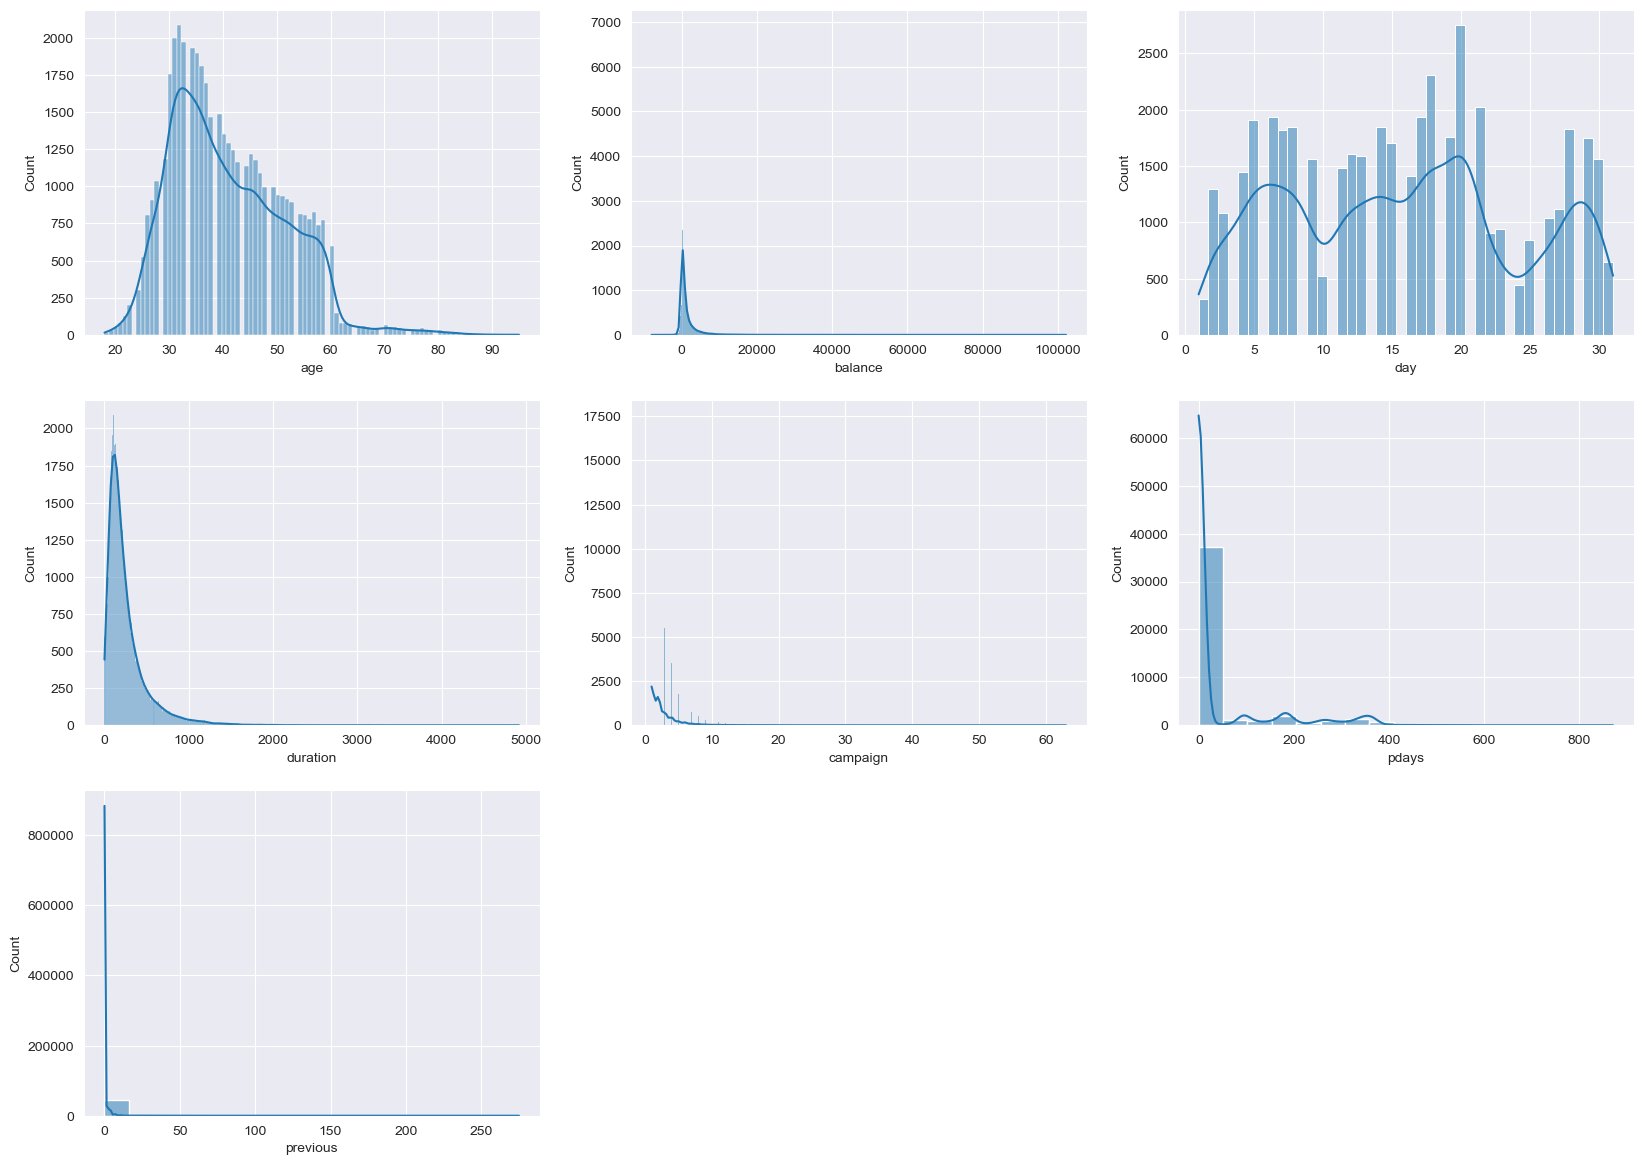

In [44]:
# Plot the distribution of numerical columns
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for feature in continuous_columns:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(data_frame[feature], kde=True)
    plt.xlabel(feature)
    plotnumber += 1
plt.show()

**According to the plots:**
* `age`, `day` is normally distributed.
* `balance`, `duration`, `campaign`, `pdays`, `previous` are left skewed.
* There should be some outliers.

#### 3.6. Get the correlation between numerical columns

**Correlation of all numerical data and target variable**
* With `y` column shows how the numerical columns are correlated with the target variable.

<Axes: >

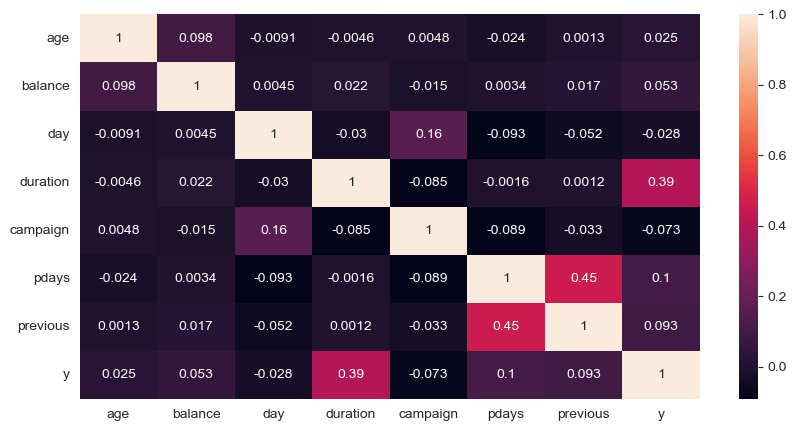

In [45]:
# Get the correlations of numerical columns
from sklearn.preprocessing import LabelEncoder

data_frame_corr = data_frame.copy()

leEn = LabelEncoder()
data_frame_corr['y'] = leEn.fit_transform(data_frame_corr['y'])

num_data_frame = data_frame_corr.select_dtypes(include='int64')
correlation = num_data_frame.corr()
fig = plt.figure(figsize=(10, 5))
sns.heatmap(correlation, annot=True)

**According to the correlation matrix:**
* No any strong correlation between any features.

#### 3.7. Examine the target variable

In [46]:
# Distribution of target variable --> y (subscribed deposit or not)
print(data_frame['y'].value_counts())

y
no     39922
yes     5289
Name: count, dtype: int64


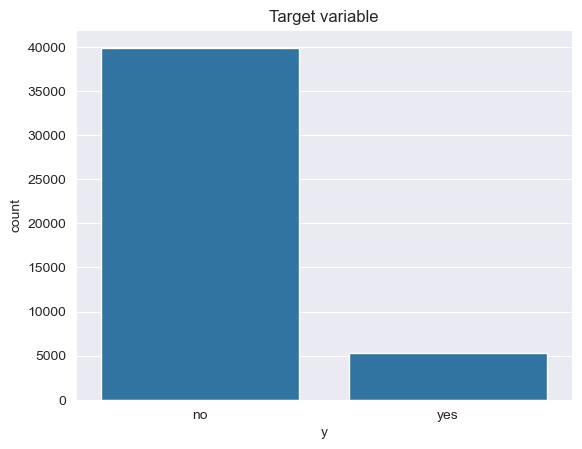

<Axes: ylabel='count'>

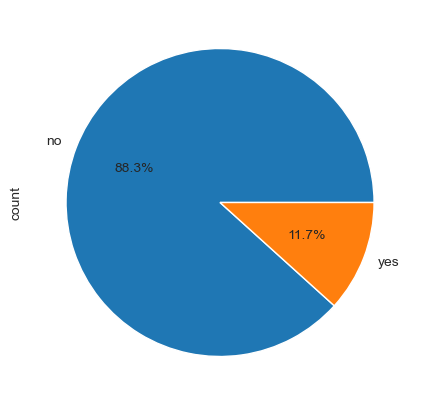

In [47]:
# Plot the distribution of the target variable
sns.countplot(x='y', data=data_frame)
plt.title('Target variable')
plt.show()

# Show pie plot 
plt.figure(figsize=(5,5))
data_frame['y'].value_counts().plot.pie(autopct='%1.1f%%')

### 4. Feature Engineering

**Selected features:**
* Numerical: `age`, `balance`, `duration`, `campaign`, `pdays`, `previous`, `day`
* Categorical: `job`, `marital`, `education`, `contact`, `month`, `poutcome`, `default`, `housing`, `loan`
* Target variable: `y`

#### 4.2. Detecting and handling outliers in numerical features

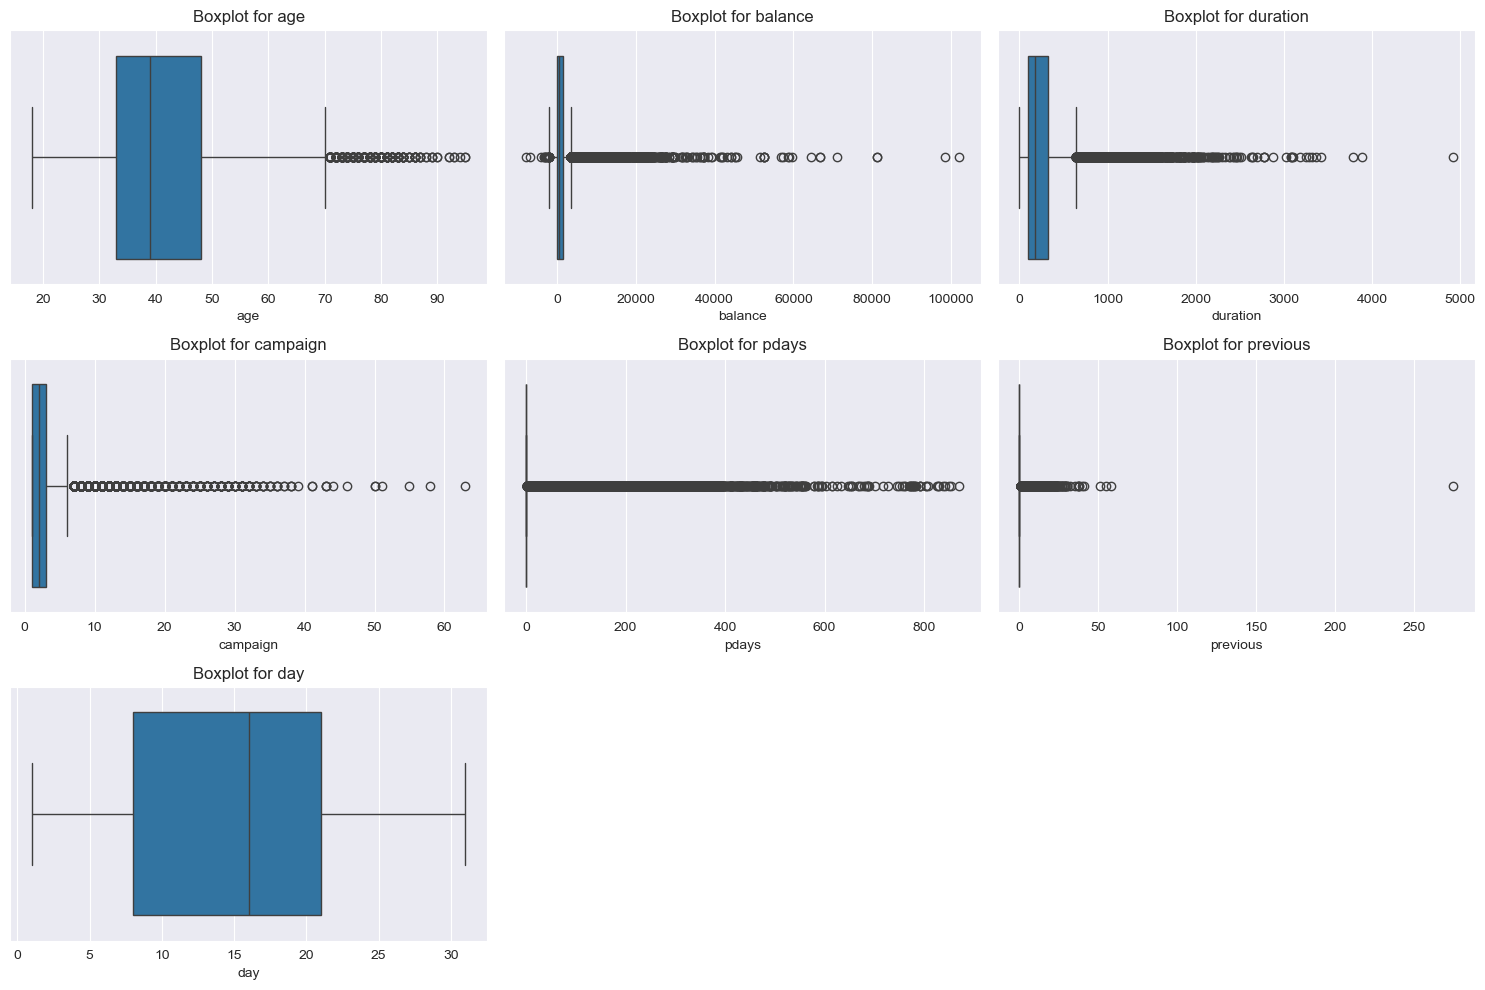

In [48]:
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']

data_frame_1 = data_frame.copy()

# Box plots for all numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data_frame_1[col])
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()

**According to the box plots:**
* `age`, `balance`, `duration`, `campaign`, `pdays`, `previous` columns have outliers.

**Handling outliers:**
* Method: Winsorization
* Winsorization --> A statistical technique that reduces the impact of outliers in data by replacing extreme values with values from a selected percentile range. (2020, GeeksforGeeks)

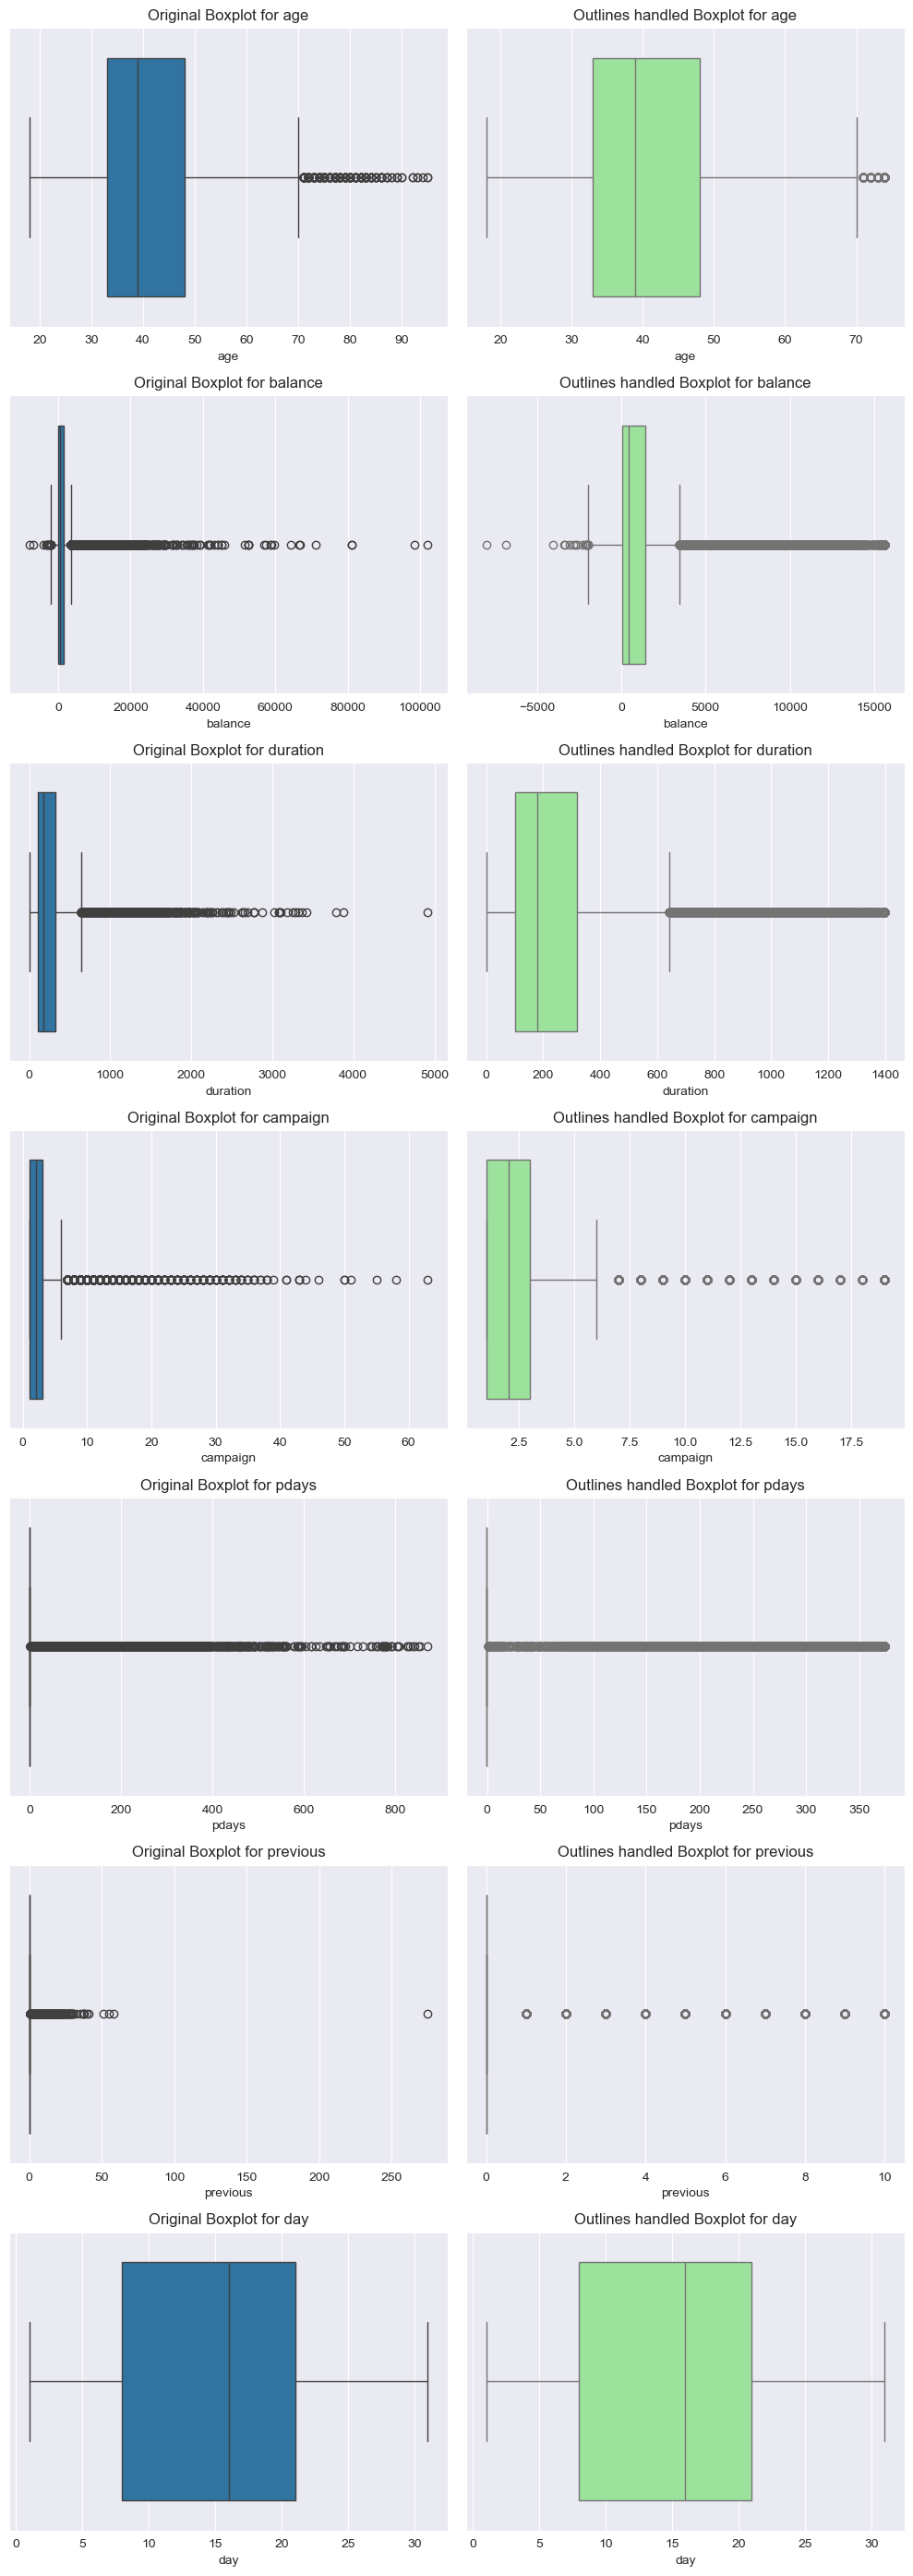

In [49]:
# Replacing extreme values method
def winsorization(column, lower_percentile = 0, upper_percentile = 99.3):
    lower_cutoff = np.percentile(column, lower_percentile)
    upper_cutoff = np.percentile(column, upper_percentile)
    return np.clip(column, lower_cutoff, upper_cutoff)

# Apply Winsorization to the numerical columns only
data_frame_2 = data_frame_1.copy()

for col in numerical_columns:
    data_frame_2[col] = winsorization(data_frame_1[col])

# Plot box plots for each column in original and Winsorized DataFrames
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(10, 4 * len(numerical_columns)))

for i, col in enumerate(numerical_columns):
    # Box plot without handling outliers
    sns.boxplot(data=data_frame_1, x=col, ax=axes[i, 0])
    axes[i, 0].set_title(f"Original Boxplot for {col}")

    # Box plot after handling outliers
    sns.boxplot(data=data_frame_2, x=col, ax=axes[i, 1], color="lightgreen")
    axes[i, 1].set_title(f"Outlines handled Boxplot for {col}")

# Layout
plt.tight_layout()
plt.show()

In [50]:
data_frame_1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [51]:
data_frame_2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.899029,1294.792485,15.806419,255.440402,2.717148,39.344452,0.533675
std,10.487190,2370.377173,8.322476,239.777066,2.728117,96.140814,1.511743
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,74.000000,15632.590000,31.000000,1398.060000,19.000000,374.000000,10.000000


#### 4.1. Encoding categorical columns

In [53]:
for feature in categorical_columns:
    print(feature,len(data_frame_2[feature].unique()))

job 12
marital 3
education 4
default 2
housing 2
loan 2
contact 3
month 12
poutcome 4
y 2


**Categorical columns:**
* Nominal:

`job`,`marital`,`education`,`contact`,`month`,`poutcome`

* Binary:

`default`,`housing`,`loan`,`y`

**Encoding:**
* Nominal columns will be one-hot encoded
* Binary columns will be label encoded

#### 4.2.1. Label encoding binary columns

In [56]:
data_frame_3 = data_frame_2.copy()

leEn = LabelEncoder()
label_encoded_col = ['y', 'loan', 'housing', 'default']
for col in label_encoded_col:
    data_frame_3[col] = leEn.fit_transform(data_frame_3[col])  # 'yes' -> 1, 'no' -> 0

#### 4.2.2. One-hot encoding nominal columns

In [57]:
# dummy encode categorical columns
categorical_columns_new = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
data_frame_3 = pd.get_dummies(data_frame_3, columns=categorical_columns_new, drop_first=False)

# Convert all boolean columns to 1 and 0
bool_columns = data_frame_3.select_dtypes(include='bool').columns
data_frame_3[bool_columns] = data_frame_3[bool_columns].astype(int)

# Check the head after encoding
data_frame_3.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143.0,1,0,5,261.0,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29.0,1,0,5,151.0,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2.0,1,1,5,76.0,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506.0,1,0,5,92.0,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1.0,0,0,5,198.0,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


### 5. Random Forest Classification

#### 5.1. Split the dataset

In [64]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [59]:
# Drop the target variable 'y'
X = data_frame_3.drop(columns=['y'])
Y = data_frame_3['y']

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [63]:
print(Y_train.value_counts())

y
0    31970
1     4198
Name: count, dtype: int64


* Not balanced dataset

In [62]:
# Check the shape of the training and testing datasets
print("X train",  X_train.shape)
print("X test", X_test.shape)

print("Y train", Y_train.shape)
print("Y test", Y_test.shape)

X train (36168, 48)
X test (9043, 48)
Y train (36168,)
Y test (9043,)


In [77]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

print("\nAccuracy Score:")
print(accuracy_score(Y_test, Y_pred))

Confusion Matrix:
[[7740  212]
 [ 677  414]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.66      0.38      0.48      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.68      0.71      9043
weighted avg       0.89      0.90      0.89      9043


Accuracy Score:
0.9016919163994249


### 6. Neural Network Classification

In [68]:
# Import libraries
import tensorflow as tf

In [71]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, stratify=Y_train, random_state=42)

In [143]:
# Build the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer
    tf.keras.layers.Dense(64, activation='relu'),      # First hidden layer
    tf.keras.layers.Dense(32, activation='relu'),      # Second hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')     # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, 
                    validation_data=(X_val, Y_val),
                    epochs=20,
                    batch_size=32)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype("int64")

Epoch 1/20
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 2s 643us/step - accuracy: 0.7926 - loss: 0.4460 - val_accuracy: 0.1243 - val_loss: 1789.7999
Epoch 2/20
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.9231 - loss: 0.2030 - val_accuracy: 0.1261 - val_loss: 1772.1809
Epoch 3/20
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.9279 - loss: 0.1875 - val_accuracy: 0.1259 - val_loss: 1628.9962
Epoch 4/20
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - accuracy: 0.9295 - loss: 0.1791 - val_accuracy: 0.1248 - val_loss: 1551.2493
Epoch 5/20
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - accuracy: 0.9320 - loss: 0.1709 - val_accuracy: 0.1241 - val_loss: 1316.9972
Epoch 6/20
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - accuracy: 0.9312 - loss: 0.1691 - val_accuracy: 0.1222 - val_loss: 1271.7216
Epoch 7/20
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - accuracy: 0.9346 - loss: 0.1601 - val_accuracy: 0.1201 - val_loss: 1112.6803
Epoch 8/20
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step

### Scale the numerical features

In [124]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_frame_scaled = data_frame_3.copy()  # Avoid modifying the original dataset


# Apply scaling to numerical features
numerical_columns = ['balance', 'duration', 'campaign', 'previous']
data_frame_scaled[numerical_columns] = scaler.fit_transform(data_frame_scaled[numerical_columns])

data_frame_scaled.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,0.429654,1,0,5,0.186687,0.0,-1,0.0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,0.340273,1,0,5,0.108007,0.0,-1,0.0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,0.339132,1,1,5,0.054361,0.0,-1,0.0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,0.402721,1,0,5,0.065805,0.0,-1,0.0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,0.339089,0,0,5,0.141625,0.0,-1,0.0,...,0,0,1,0,0,0,0,0,0,1


In [125]:
# Split the dataset
X = data_frame_scaled.drop(columns=['y'])
Y = data_frame_scaled['y']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [126]:
print(Y_train.value_counts())

y
0    31970
1     4198
Name: count, dtype: int64


* Not balanced dataset

#### Balance the dataset

In [127]:
# Import libraries
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training set
X_train, Y_train = smote.fit_resample(X_train, Y_train)

# Check the class distribution after applying SMOTE
print(Y_train.value_counts())

y
0    31970
1    31970
Name: count, dtype: int64


### 7. Build Neural Network using Keras

In [129]:
# Import libraries
from keras.models import Sequential
from keras.layers import Dense, Input

# Input parameters
first_units = 100  # Number of neurons in the first layer
activation = 'relu'  # Activation function
weight_initializer = 'random_uniform'  # Weight initialization method
input_dim = X_train.shape[1]  # Number of input features

# Creating keras classifier neural networks Dense (Fully connected)
clf = Sequential()
# Input layer
clf.add(Input(shape=(input_dim,)))
# First hidden layer
clf.add(Dense(units=first_units, activation=activation, kernel_initializer=weight_initializer))
# Second hidden layer
clf.add(Dense(units=first_units, activation=activation, kernel_initializer=weight_initializer))
# Third hidden layer
clf.add(Dense(units=first_units, activation=activation, kernel_initializer=weight_initializer))

# Neural networks output params
units1 = 1  # Binary output decision
activation1 = 'sigmoid'  # Activation function of binary classification

# Output layer
clf.add(Dense(units=units1, activation=activation1))

In [130]:
# optimizer model params 
optmizer = 'adam' # function of weights adjust
loss = 'binary_crossentropy' # loss function, error evaluate
metrics = 'binary_accuracy' # evaluate metric
clf.compile(optimizer = optmizer , loss = loss , metrics = [metrics])

In [138]:
# training model
clf.fit(X_train , Y_train , batch_size = 5 , epochs = 15 )

Epoch 1/15
12788/12788 ━━━━━━━━━━━━━━━━━━━━ 7s 562us/step - binary_accuracy: 0.9385 - loss: 0.1418
Epoch 2/15
12788/12788 ━━━━━━━━━━━━━━━━━━━━ 7s 549us/step - binary_accuracy: 0.9380 - loss: 0.1442
Epoch 3/15
12788/12788 ━━━━━━━━━━━━━━━━━━━━ 7s 549us/step - binary_accuracy: 0.9376 - loss: 0.1411
Epoch 4/15
12788/12788 ━━━━━━━━━━━━━━━━━━━━ 7s 551us/step - binary_accuracy: 0.9392 - loss: 0.1400
Epoch 5/15
12788/12788 ━━━━━━━━━━━━━━━━━━━━ 7s 557us/step - binary_accuracy: 0.9389 - loss: 0.1407
Epoch 6/15
12788/12788 ━━━━━━━━━━━━━━━━━━━━ 7s 552us/step - binary_accuracy: 0.9395 - loss: 0.1396
Epoch 7/15
12788/12788 ━━━━━━━━━━━━━━━━━━━━ 7s 561us/step - binary_accuracy: 0.9395 - loss: 0.1432
Epoch 8/15
12788/12788 ━━━━━━━━━━━━━━━━━━━━ 7s 564us/step - binary_accuracy: 0.9381 - loss: 0.1406
Epoch 9/15
12788/12788 ━━━━━━━━━━━━━━━━━━━━ 7s 565us/step - binary_accuracy: 0.9385 - loss: 0.1402
Epoch 10/15
12788/12788 ━━━━━━━━━━━━━━━━━━━━ 7s 581us/step - binary_accuracy: 0.9406 - loss: 0.1387
Epoch 11/

In [139]:
# making predictions
predictions = clf.predict(X_test)
predictions = (predictions > 0.5)

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step


In [140]:
# evaluating accuracy with test dataset
acc = accuracy_score(Y_test , predictions)
print('Neural Network Accuracy: ',round(acc , 3)*100,'%')

Neural Network Accuracy:  90.3 %


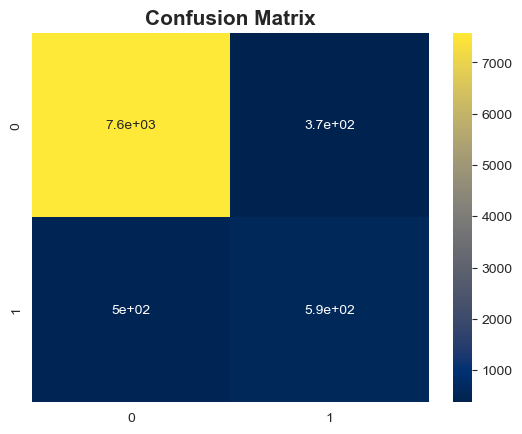

In [141]:
# confusion matrix
cm = confusion_matrix(Y_test , predictions)
sns.heatmap(cm, annot=True , cmap ='cividis')
plt.title('Confusion Matrix' , size = 15 , weight = 'bold')
plt.show()